In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv('stock_price.csv', index_col='日付け', parse_dates=True)
axis = ['close', 'open', 'high', 'low', 'volume', 'rate']
df.columns = axis
df.index.name = 'date'
df = df.sort_index()
df = df.drop(['rate'], axis=1)

def convert_volume(volume):
    if isinstance(volume, str):
        if 'B' in volume:
            return int(float(volume.replace('B', '')) * 1e9)
        elif 'M' in volume:
            return int(float(volume.replace('M', '')) * 1e6)
        elif 'K' in volume:
            return int(float(volume.replace('K', '')) * 1e3)
    return int(volume)

df['volume'] = df['volume'].apply(convert_volume)
df.head()

,close,open,high,low,volume
date,,,,,
1987-02-12,182.4,182.4,182.4,182.4,1280000000
1987-02-13,172.5,176.5,176.5,172.5,422380000
1987-02-16,175.5,166.7,175.5,165.7,360510000
1987-02-17,182.4,176.5,184.3,175.5,881510000
1987-02-18,191.2,186.3,191.2,186.3,795090000


In [10]:
# from tsfresh import extract_features, extract_relevant_features, select_features

# df_2000 = df.loc['2000-01-01':'2000-12-31']
# df_extracted = extract_features(df_2000, column_id='close')
# df_extracted.head()

In [11]:
# df_extracted.describe()

In [12]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.head()

,close,open,high,low,volume
date,,,,,
1987-02-12,1.788304,1.781658,1.747868,1.818317,8.850080
1987-02-13,1.592069,1.665047,1.632289,1.620652,1.995764
1987-02-16,1.651534,1.471354,1.612699,1.484882,1.501283
1987-02-17,1.788304,1.665047,1.785089,1.680551,5.665247
1987-02-18,1.962736,1.858740,1.920258,1.896186,4.974557


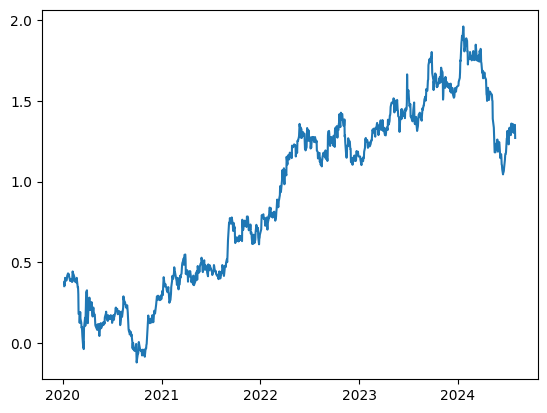

In [15]:
import matplotlib.pyplot as plt
plt.plot(df_scaled.loc['2020':'2024']['close'], label='close')

In [14]:
df_scaled.to_csv('stock_price_scaled.csv', index=True)